In [3]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(10)

In [4]:
from DATA import MG17
from IPReservoir import IPReservoir
from Evaluator import Evaluator
from Metrics import *
from IPMask import IPMask

## Neural Avalanches Analysis

In [5]:
from DATA import MG17

data = MG17(percentages=[80, 0, 20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

In [6]:
vanilla_reservoir = Reservoir(N = 100, bias=False, input_scaling=0.5, desired_rho=0.8)
gaussian_reservoir = IPReservoir(N=100, bias=False,  input_scaling=0.5,desired_rho=0.8, mask= IPMask.gaussian(100, std=0.25))
bimodal_reservoir = IPReservoir(N=100, bias=False,  input_scaling=0.5,desired_rho=0.8, mask=IPMask.bimodal(100, mu=0.85, std=0.15))
trimodal_reservoir = IPReservoir(N=100, bias=False,  input_scaling=0.5,desired_rho=0.8, mask=IPMask.trimodal(100, linear_rate=0.75, mu=0.85, std_bim=0.1))

In [20]:
MC().evaluate(vanilla_reservoir)

tensor(12.6282)

### Training Gaussian Reservori 

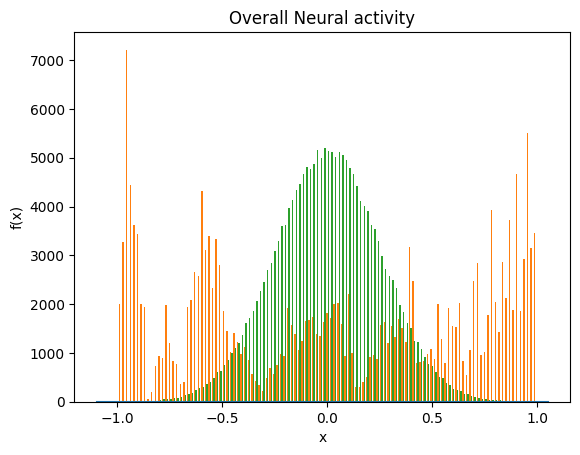

In [7]:
gaussian_reservoir.plot_neural_activity(X_TS)

- Epoch: 1) | KL Divergence value: 0.21148806810379028. | Spectral radius: 0.8158184289932251
- Epoch: 2) | KL Divergence value: 0.1880607008934021. | Spectral radius: 0.8310115933418274
- Epoch: 3) | KL Divergence value: 0.1666913777589798. | Spectral radius: 0.8460792303085327
- Epoch: 4) | KL Divergence value: 0.14802268147468567. | Spectral radius: 0.8611096143722534
- Epoch: 5) | KL Divergence value: 0.1324543058872223. | Spectral radius: 0.8754242062568665
- Epoch: 6) | KL Divergence value: 0.11948335915803909. | Spectral radius: 0.8897364735603333
- Epoch: 7) | KL Divergence value: 0.10830184072256088. | Spectral radius: 0.9040524363517761
- Epoch: 8) | KL Divergence value: 0.09824240952730179. | Spectral radius: 0.9177634119987488
- Epoch: 9) | KL Divergence value: 0.08875560760498047. | Spectral radius: 0.9313229322433472
- Epoch: 10) | KL Divergence value: 0.07953549176454544. | Spectral radius: 0.9448871612548828


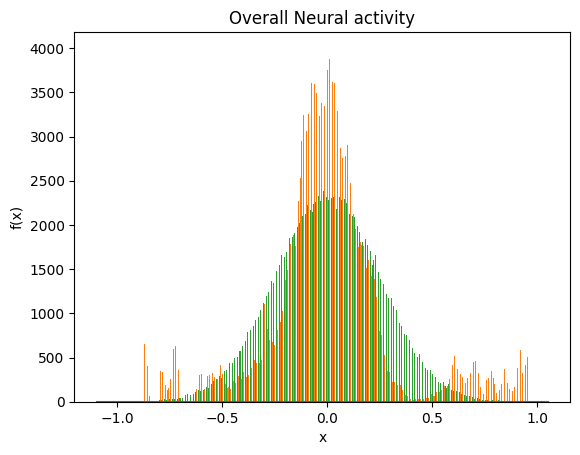

In [8]:
gaussian_reservoir.IP_online(X_TR, eta=0.0000025, eval_kl=X_TS, epochs=10, verbose=True)
gaussian_reservoir.plot_neural_activity(X_TS)

In [9]:

MLLE(X_TS).evaluate(gaussian_reservoir)

0.07931713

In [10]:
DeltaPhi().evaluate(gaussian_reservoir)

0.061988222973445424

In [11]:
MC().evaluate(gaussian_reservoir)

tensor(18.4324)

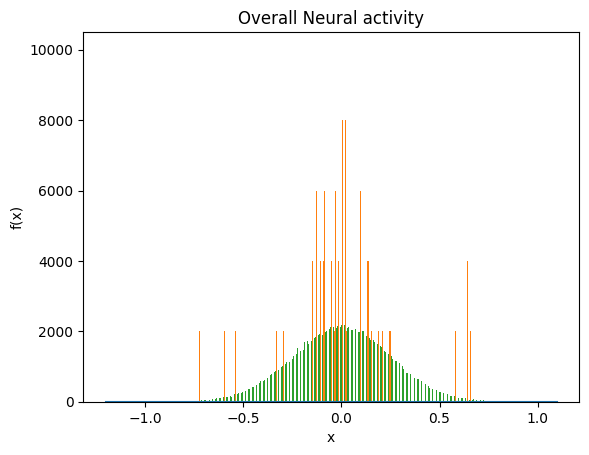

In [12]:
gaussian_reservoir.plot_neural_activity(torch.zeros(2000))

In [13]:
H_gaussian = gaussian_reservoir.predict(X_TS)

In [14]:
MLLE(torch.zeros(500)).evaluate(gaussian_reservoir)

0.10968753

### Traning Bimodal Reservoir

In [15]:
bimodal_reservoir.IP_online(X_TR, eta=0.0000025, eval_kl=X_TS, epochs=10, verbose=True)

- Epoch: 1) | KL Divergence value: 0.035266630351543427. | Spectral radius: 0.8158202171325684
- Epoch: 2) | KL Divergence value: 0.024386372417211533. | Spectral radius: 0.8310106992721558
- Epoch: 3) | KL Divergence value: 0.020184053108096123. | Spectral radius: 0.8460785746574402
- Epoch: 4) | KL Divergence value: 0.018069248646497726. | Spectral radius: 0.8611081838607788
- Epoch: 5) | KL Divergence value: 0.016832593828439713. | Spectral radius: 0.8754212856292725
- Epoch: 6) | KL Divergence value: 0.016048554331064224. | Spectral radius: 0.8897364735603333
- Epoch: 7) | KL Divergence value: 0.015521617606282234. | Spectral radius: 0.9040501117706299
- Epoch: 8) | KL Divergence value: 0.015146857127547264. | Spectral radius: 0.9177627563476562
- Epoch: 9) | KL Divergence value: 0.0148749565705657. | Spectral radius: 0.9313217401504517
- Epoch: 10) | KL Divergence value: 0.014673718251287937. | Spectral radius: 0.9448834657669067


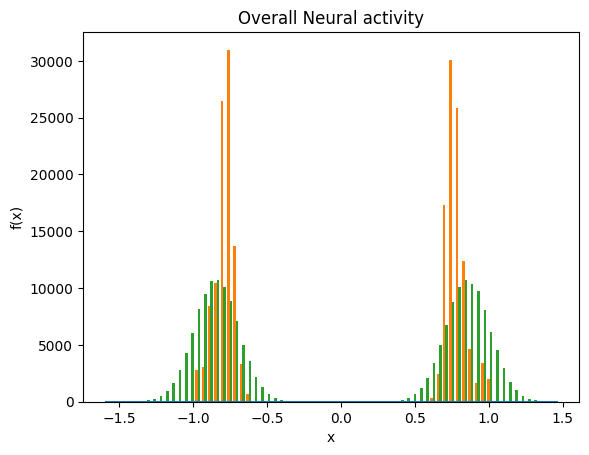

In [16]:
bimodal_reservoir.plot_neural_activity(X_TS)

In [17]:
MLLE(torch.zeros(500)).evaluate(bimodal_reservoir)

-0.95428395

In [27]:
MC().evaluate(bimodal_reservoir)

tensor(10.8465)

### Training Trimodal Reservoir

- Epoch: 1) | KL Divergence value: 0.08562325686216354. | Spectral radius: 0.81582111120224
- Epoch: 2) | KL Divergence value: 0.058715514838695526. | Spectral radius: 0.8310132026672363
- Epoch: 3) | KL Divergence value: 0.040266960859298706. | Spectral radius: 0.8460787534713745
- Epoch: 4) | KL Divergence value: 0.030044561251997948. | Spectral radius: 0.861110270023346
- Epoch: 5) | KL Divergence value: 0.024780167266726494. | Spectral radius: 0.8754240870475769
- Epoch: 6) | KL Divergence value: 0.022217994555830956. | Spectral radius: 0.8897393345832825
- Epoch: 7) | KL Divergence value: 0.020986219868063927. | Spectral radius: 0.9040563702583313
- Epoch: 8) | KL Divergence value: 0.020394952967762947. | Spectral radius: 0.917760968208313
- Epoch: 9) | KL Divergence value: 0.02015780843794346. | Spectral radius: 0.9313254952430725
- Epoch: 10) | KL Divergence value: 0.02013276517391205. | Spectral radius: 0.9448853731155396
- Epoch: 11) | KL Divergence value: 0.020237574353814125

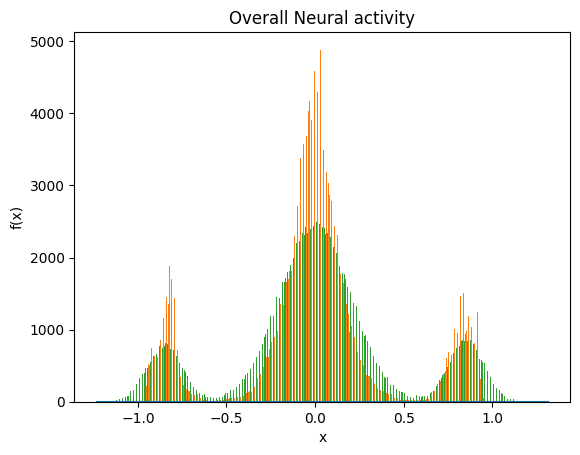

0.3499158

In [18]:
trimodal_reservoir.IP_online(X_TR, eta=0.0000025, eval_kl=X_TS, epochs=20, verbose=True)
trimodal_reservoir.plot_neural_activity(X_TS)
MLLE(X_TS).evaluate(trimodal_reservoir)

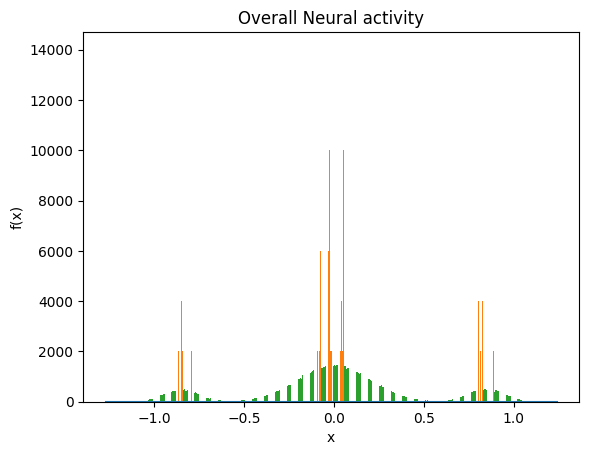

In [21]:
trimodal_reservoir.plot_neural_activity(torch.zeros(2000))

In [22]:
MLLE(torch.zeros(500)).evaluate(trimodal_reservoir)

0.35859132

In [23]:
DeltaPhi().evaluate(trimodal_reservoir)

0.06299274919992666

In [25]:
MC().evaluate(trimodal_reservoir)

tensor(16.7444)

In [28]:
H_trim = trimodal_reservoir.predict(X_TS)

In [ ]:
import seaborn as sns
import pandas as pd

1999

In [ ]:
df = pd.DataFrame(H_trim[:,1:4].numpy())
df.insert(0,'Index', np.arange(X))

In [ ]:
np.arange(H_trim.shape[0])

array([   0,    1,    2, ..., 1996, 1997, 1998])

In [ ]:
tensor_data = torch.vstack([torch.mean(H_gaussian,axis = 1), X_TS])

In [ ]:
tensor_data.shape

torch.Size([2, 1999])

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example 2D tensor with N lines
N = 2
timepoints = np.arange(H_trim.shape[0])

#tensor_data = H_gaussian.numpy()[:,0:N]

# Create a Pandas DataFrame with the tensor data
df = pd.DataFrame(tensor_data.numpy().T, columns=[f'Neuron {i+1}' for i in range(N)])

# Use Seaborn's lineplot() function to plot the N lines
sns.set(style="whitegrid")  # Set the style if needed
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

sns.lineplot(data=df, markers=True)

plt.title(f'{N} Lines Plot')
plt.xlabel('Timepoints (Index)')
plt.ylabel('Data Values')

NameError: name 'H_trim' is not defined

In [ ]:
gaussian_reservoir.mask.means()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [ ]:
trimodal_reservoir

In [ ]:
H_gaussian.shape

torch.Size([1999, 100])

In [ ]:
H_gaussian = gaussian_reservoir.predict(torch.zeros(2000))#+(0.01**0.5)*torch.randn(2000))

In [ ]:
H_gaussian.h

torch.Size([100, 2000])

## Sample of Neural Avalanche Plotting

In [ ]:
# Function to plot activation avalanches
def plot_activation_avalanches(activation_history):
    # Compute dynamical correlation
    correlation_matrix = np.corrcoef(activation_history.T)

    # Plot dynamical correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, annot=False)
    plt.title('Dynamical Correlation Matrix')
    plt.show()

    avalanche_sizes = np.sum(np.abs(np.diff(activation_history, axis=0)) > 0, axis=1)

    plt.figure(figsize=(10, 6))
    sns.histplot(avalanche_sizes, bins=range(1, max(avalanche_sizes) + 2), kde=False)
    plt.title('Activation Avalanche Sizes')
    plt.xlabel('Avalanche Size')
    plt.ylabel('Frequency')
    plt.show()

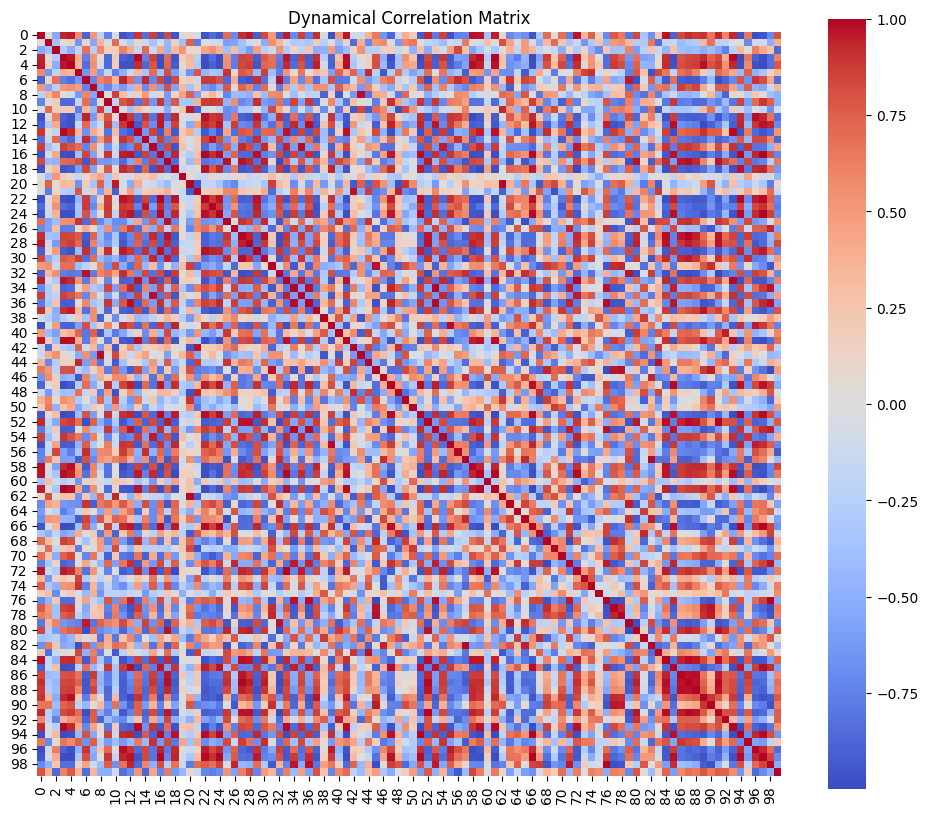

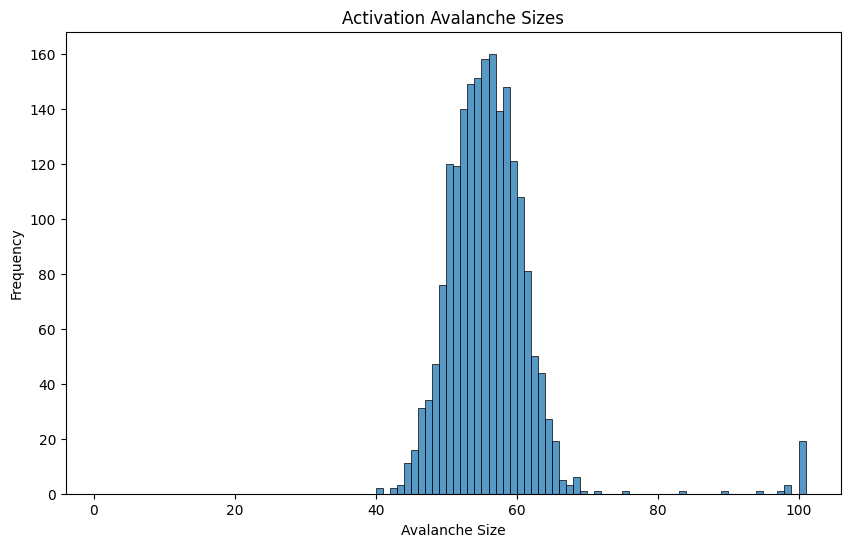

In [ ]:
plot_activation_avalanches(vanilla_reservoir.predict(torch.zeros(2000)))

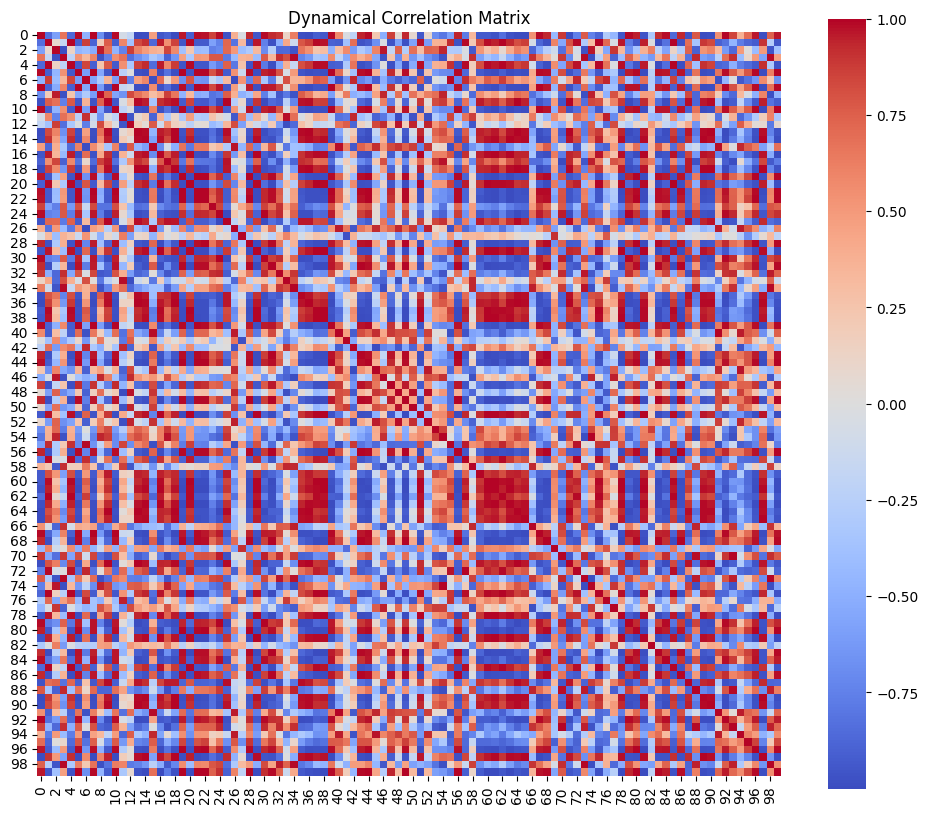

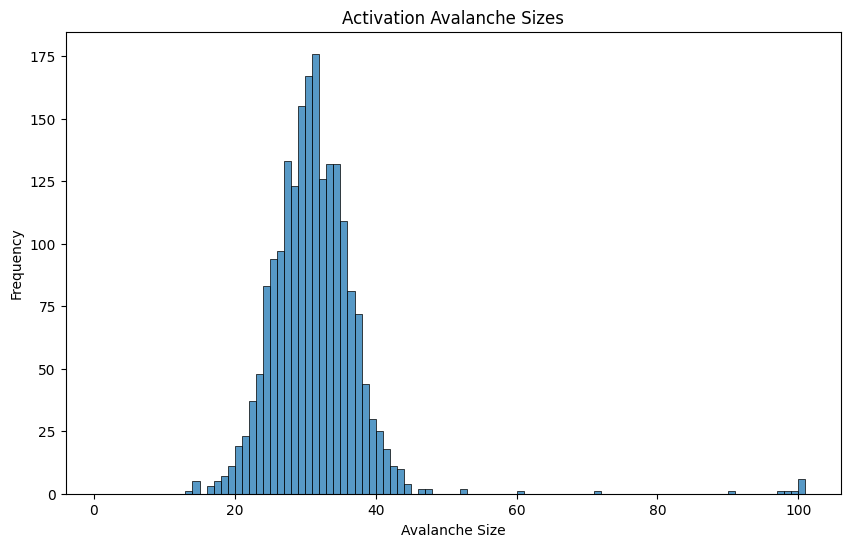

In [ ]:
plot_activation_avalanches(bimodal_reservoir.predict(torch.zeros(2000)))

In [ ]:
bimodal_reservoir.rho()

tensor(0.9449)

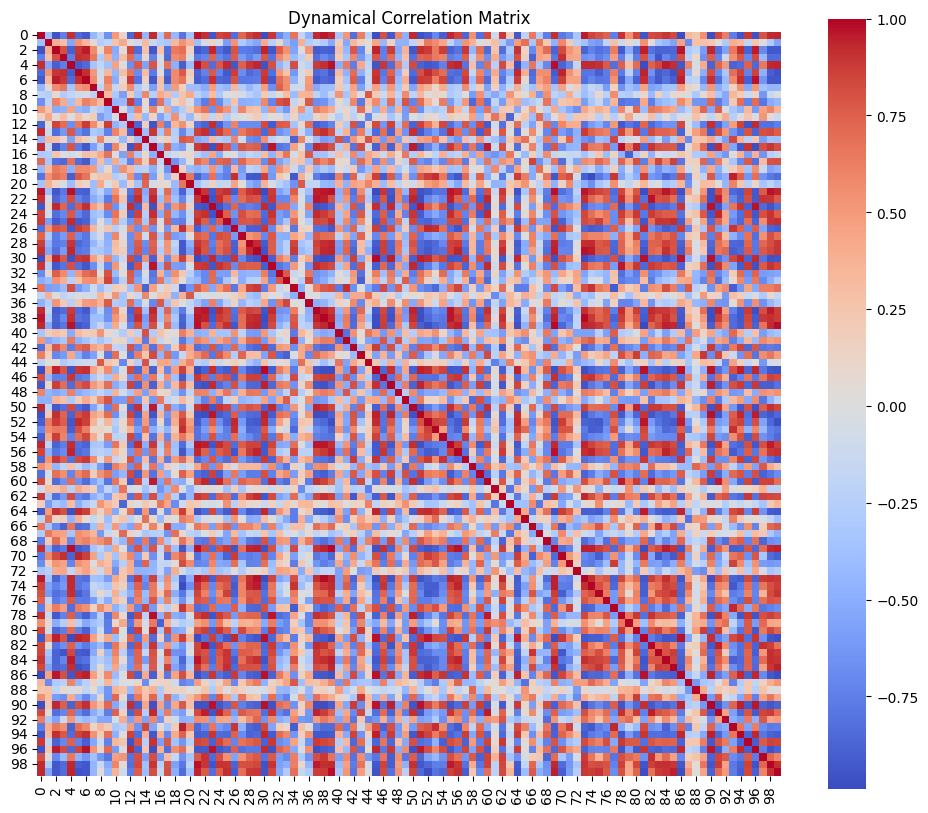

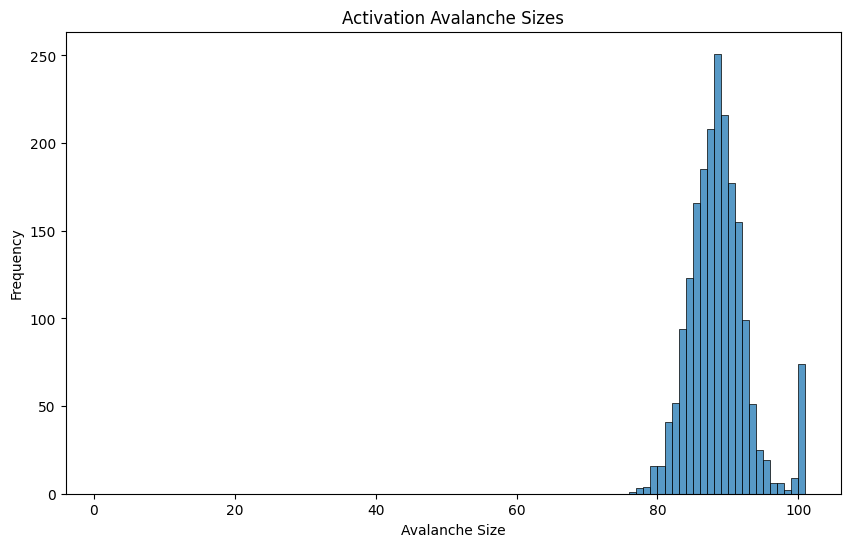

In [ ]:
plot_activation_avalanches(trimodal_reservoir.predict(torch.zeros(2000)))

In [ ]:
gaussian_reservoir.rho()

tensor(0.8000)

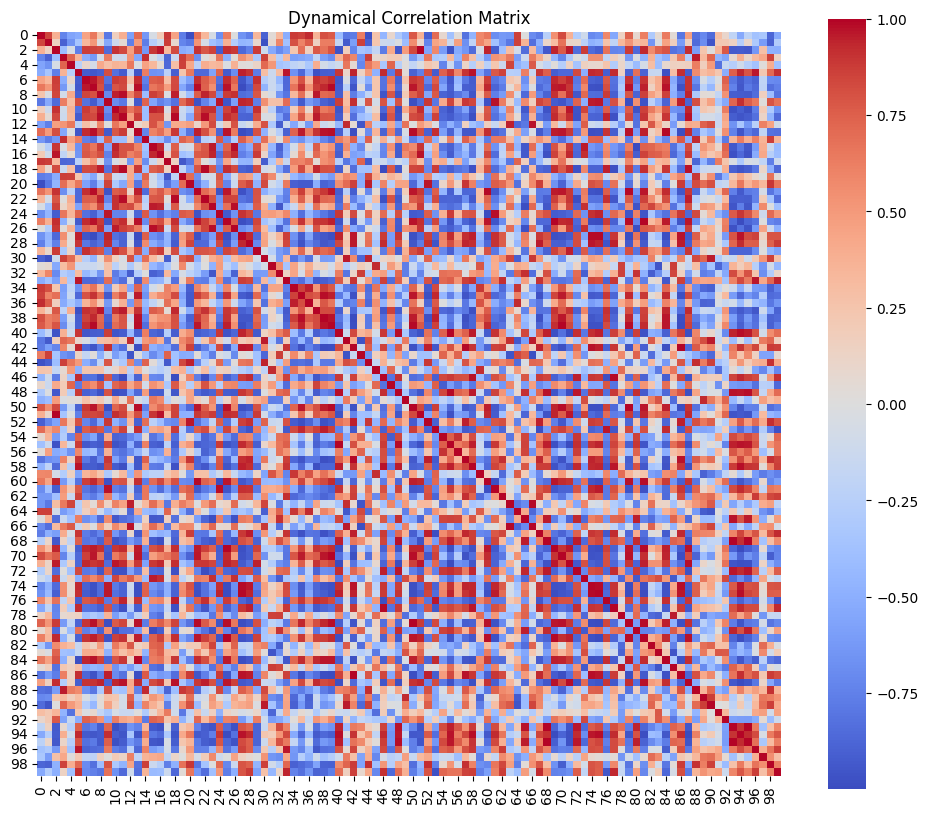

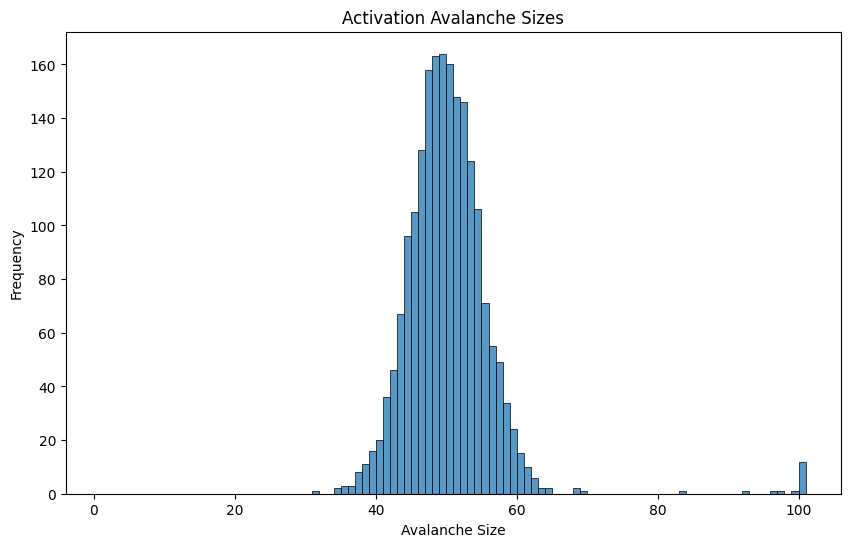

In [ ]:
plot_activation_avalanches(H_gaussian)